In [1]:
import os, sys
import numpy as np
import pickle
import pandas
import gzip

In [2]:
import matplotlib.pyplot as plt
import cca_core

In [3]:
%matplotlib inline

In [7]:
def plot_map(arr, x_label, y_label):
    plt.plot(arr)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()

In [8]:
A = np.random.randn(100, 2000)
B = np.random.randn(50, 2000)

In [9]:
results = cca_core.get_cca_similarity(A, B, verbose=True)

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!


In [10]:
results.keys()

dict_keys(['coef_x', 'invsqrt_xx', 'full_coef_x', 'full_invsqrt_xx', 'coef_y', 'invsqrt_yy', 'full_coef_y', 'full_invsqrt_yy', 'neuron_means1', 'neuron_means2', 'cca_coef1', 'cca_coef2', 'x_idxs', 'y_idxs', 'mean', 'sum'])

In [12]:
results["cca_coef1"].shape

(50,)

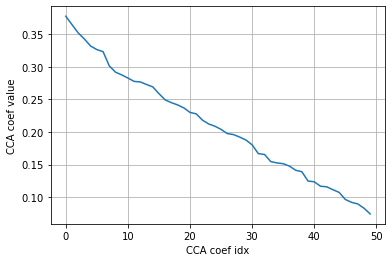

In [16]:
plot_map(results["cca_coef1"], "CCA coef idx", "CCA coef value")

In [18]:
print("Similarity between A and B  is :{}".format(np.mean(results["cca_coef1"])))

Similarity between A and B  is :0.21031540904989035


In [19]:
A_transform = np.dot(np.random.randn(100, 100), A)

In [20]:
results2 = cca_core.get_cca_similarity(A, A_transform, verbose=True)

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!


In [21]:
results2["cca_coef1"].shape

(100,)

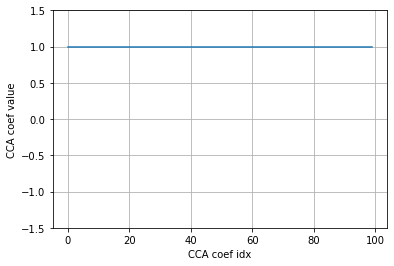

In [33]:
plt.ylim(-1.5, 1.5)
plt.plot(results2["cca_coef1"], )
plt.xlabel("CCA coef idx")
plt.ylabel("CCA coef value")
plt.grid()

In [34]:
print("Similarity between A and B  is :{:.6f}".format(np.mean(results2["cca_coef1"])))

Similarity between A and B  is :1.000000


In [36]:
results_list = []

num_datapoints = [101, 200, 500, 1000, 2000, 5000, 10000]

for item in num_datapoints:
    
    A = np.random.randn(100, item)
    B = np.random.randn(100, item)
    tmp_results = cca_core.get_cca_similarity(A, B, verbose=False)
    results_list.append(np.mean(tmp_results["cca_coef1"]))

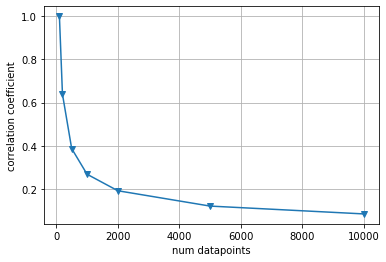

In [39]:
plt.plot(num_datapoints, results_list, marker="v")
plt.xlabel("num datapoints")
plt.ylabel("correlation coefficient")
plt.grid()

In [41]:
results["cca_coef1"]

array([0.37737255, 0.3645001 , 0.35180677, 0.34239331, 0.33165766,
       0.32627161, 0.32307082, 0.30132496, 0.2916381 , 0.28744178,
       0.28263166, 0.27749859, 0.27663495, 0.27276053, 0.26909669,
       0.25872073, 0.24914601, 0.24489768, 0.24146679, 0.23691175,
       0.22990146, 0.22775916, 0.21810685, 0.21229383, 0.20881108,
       0.20392264, 0.1975037 , 0.19593631, 0.19212341, 0.1876374 ,
       0.1802385 , 0.16677943, 0.16544648, 0.15457667, 0.15249486,
       0.1513381 , 0.14765416, 0.14132087, 0.13903935, 0.12476476,
       0.12357594, 0.11681178, 0.11589357, 0.11148206, 0.1073439 ,
       0.0965058 , 0.09208575, 0.08969308, 0.08315055, 0.07433599])

In [42]:
np.sum(results["cca_coef1"][:20]) / np.sum(results["cca_coef1"])

0.5617508540360526

In [43]:
20.0 / results["cca_coef1"].shape[0]

0.4

In [44]:
with open("./model_activations/MNIST/model_0_lay02.p", "rb") as f:
    acts1 = pickle.load(f)
with open("./model_activations/MNIST/model_1_lay02.p", "rb") as f:
    acts2 = pickle.load(f)

784 (Input) --- 500 --- 500 --- 500 -- 10 (Output)

In [45]:
print("activation shapes: {}, {}".format(acts1.shape, acts2.shape))

activation shapes: (500, 10000), (500, 10000)


In [46]:
results3 = cca_core.get_cca_similarity(acts1, acts2, epsilon=1e-10, verbose=False)

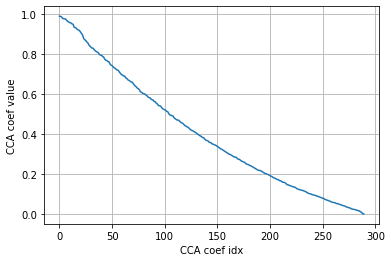

In [47]:
plot_map(results3["cca_coef1"], "CCA coef idx", "CCA coef value")

In [48]:
print("Similarity between A and B  is :{:.6f}".format(np.mean(results3["cca_coef1"])))

Similarity between A and B  is :0.406767


In [49]:
u, s, v = np.linalg.svd(acts1 - np.mean(acts1, axis=1, keepdims=True), full_matrices=False)

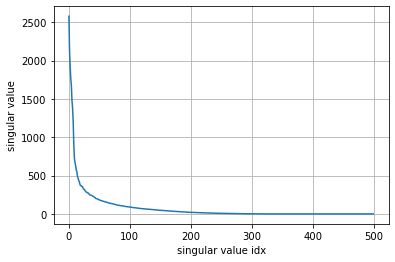

In [50]:
plot_map(s, "singular value idx", "singular value")

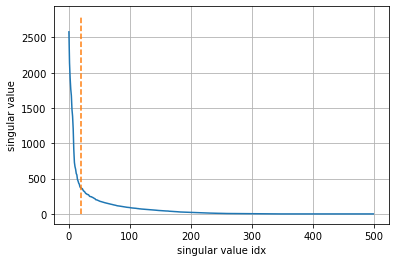

In [51]:
plot_map(s, "singular value idx", "singular value")
plt.plot([20] * 100, np.linspace(0, 2800, 100), linestyle="--")

In [55]:
print("Fraction of variance explained by 20 singular vectors: {:.6}".format(np.sum(s[:20]) / np.sum(s)))

Fraction of variance explained by 20 singular vectors: 0.507615


In [56]:
b1 = np.random.randn(*acts1.shape)
b2 = np.random.randn(*acts2.shape)

In [57]:
baseline = cca_core.get_cca_similarity(b1, b2, verbose=False)

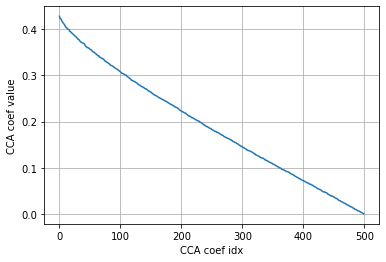

In [58]:
plot_map(baseline["cca_coef1"], "CCA coef idx", "CCA coef value")

In [59]:
print("baseline mea cca similarity between b1 and b2  is :{:.6f}".format(np.mean(baseline["cca_coef1"])))
print("baseline mea cca similarity between acts1 and acts2  is :{:.6f}".format(np.mean(results3["cca_coef1"])))

baseline mea cca similarity between b1 and b2  is :0.190703
baseline mea cca similarity between acts1 and acts2  is :0.406767


In [62]:
print("averaging top cca values:")
print("baseline: {}, minist: {}".format(np.mean(baseline["cca_coef1"][:20]), np.mean(results3["cca_coef1"][:20])))

averaging top cca values:
baseline: 0.4083933007155934, minist: 0.9575065217193097


In [64]:
cacts1 = acts1 - np.mean(acts1, axis=1, keepdims=True)
cacts2 = acts2 - np.mean(acts2, axis=1, keepdims=True)

In [65]:
u1, s1, v1 = np.linalg.svd(cacts1, full_matrices=False)
u2, s2, v2 = np.linalg.svd(cacts2, full_matrices=False)

In [67]:
s1.shape, cacts1.shape

((500,), (500, 10000))

In [68]:
svacts1 = np.dot(s1[:20] * np.eye(20), v1[:20])
svacts2 = np.dot(s2[:20] * np.eye(20), v2[:20])

In [69]:
results_4 = cca_core.get_cca_similarity(svacts1, svacts2, verbose=False)

In [70]:
cb1 = b1 - np.mean(b1, axis=1, keepdims=True)
cb2 = b2 - np.mean(b2, axis=1, keepdims=True)

In [71]:
bu1, bs1, bv1 = np.linalg.svd(cb1, full_matrices=True)
bu2, bs2, bv2 = np.linalg.svd(cb2, full_matrices=True)

In [72]:
sbv1 = np.dot(bs1[:20] * np.eye(20), bv1[:20])
sbv2 = np.dot(bs2[:20] * np.eye(20), bv2[:20])

In [73]:
svcca_baseline = cca_core.get_cca_similarity(sbv1, sbv2, verbose=False)

In [74]:
print("baseline: {}, minist: {}".format(np.mean(svcca_baseline["cca_coef1"]), np.mean(results_4["cca_coef1"])))

baseline: 0.03746492697789634, minist: 0.7331312395527988


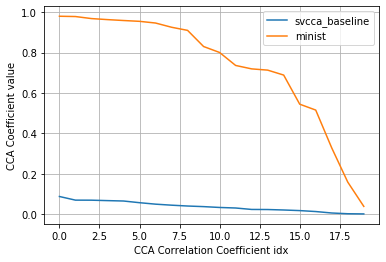

In [77]:
plt.plot(svcca_baseline["cca_coef1"], label="svcca_baseline")
plt.plot(results_4["cca_coef1"], label="minist")
plt.xlabel("CCA Correlation Coefficient idx")
plt.ylabel("CCA Coefficient value")
plt.grid()
plt.legend()